In [1]:
import os
import boto
import pandas as pd
import urllib2
from urllib import urlretrieve 
import dicom
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from boto.s3.key import Key

In [2]:
import sys
import cv2
from matplotlib.pyplot import savefig

In [3]:
import matplotlib.image as mpimg

In [4]:
sys.version_info

sys.version_info(major=2, minor=7, micro=10, releaselevel='final', serial=0)

In [5]:
%matplotlib inline

In [7]:
conn = boto.connect_s3(KEY, SECRET)

In [8]:
conn.get_all_buckets()

[<Bucket: capstoneerichullander>,
 <Bucket: datasciencebowl>,
 <Bucket: elasticbeanstalk-us-west-2-143473848749>,
 <Bucket: erich2015>]

In [10]:
b = conn.get_bucket('datasciencebowl')

In [81]:
keys = [x for x in b.list("train/10/study/sax_10/I")]

In [89]:
keys[0].name[-8::]

u'0001.dcm'

In [83]:
cd

/home/ubuntu


In [90]:
for i, key in enumerate(keys):
    filename =  'tmp/' + str(i) + '.dcm'
    key.get_contents_to_filename(key.name[-8::])

In [7]:
cd tmp

/Users/fiannacci/data_science/datasciencebowl/tmp


In [8]:
ls

0001.dcm   0004.dcm   0007.dcm   0010.dcm   0013.dcm   0016.dcm   0019.dcm   0022.dcm   0025.dcm   0028.dcm   test.png
0002.dcm   0005.dcm   0008.dcm   0011.dcm   0014.dcm   0017.dcm   0020.dcm   0023.dcm   0026.dcm   0029.dcm   test1.png
0003.dcm   0006.dcm   0009.dcm   0012.dcm   0015.dcm   0018.dcm   0021.dcm   0024.dcm   0027.dcm   0030.dcm


In [9]:
path = "."

In [10]:
sorted(os.listdir("."))

['0001.dcm',
 '0002.dcm',
 '0003.dcm',
 '0004.dcm',
 '0005.dcm',
 '0006.dcm',
 '0007.dcm',
 '0008.dcm',
 '0009.dcm',
 '0010.dcm',
 '0011.dcm',
 '0012.dcm',
 '0013.dcm',
 '0014.dcm',
 '0015.dcm',
 '0016.dcm',
 '0017.dcm',
 '0018.dcm',
 '0019.dcm',
 '0020.dcm',
 '0021.dcm',
 '0022.dcm',
 '0023.dcm',
 '0024.dcm',
 '0025.dcm',
 '0026.dcm',
 '0027.dcm',
 '0028.dcm',
 '0029.dcm',
 '0030.dcm',
 'test.png',
 'test1.png']

./0001.dcm
1 99.5464477539 0001.dcm


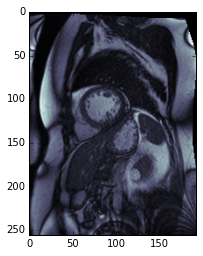

./0002.dcm
2 99.4981079102 0002.dcm


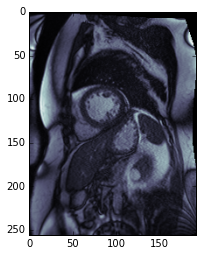

./0003.dcm
3 99.3083699544 0003.dcm


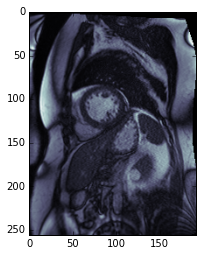

./0004.dcm
4 99.2025553385 0004.dcm


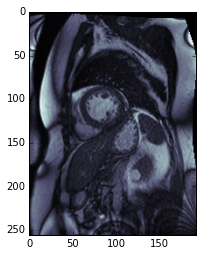

./0005.dcm
5 99.187113444 0005.dcm


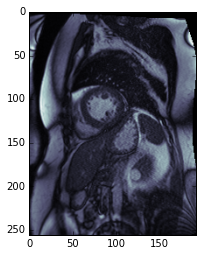

./0006.dcm
6 99.2319539388 0006.dcm


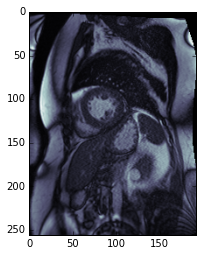

./0007.dcm
7 99.0783691406 0007.dcm


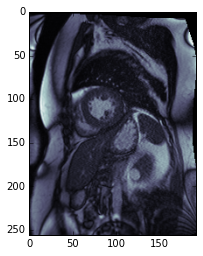

./0008.dcm
8 98.9121500651 0008.dcm


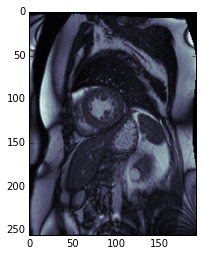

./0009.dcm
9 98.8275146484 0009.dcm


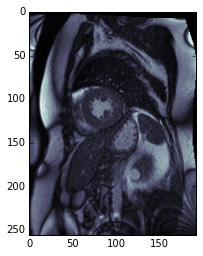

./0010.dcm
10 98.6051432292 0010.dcm


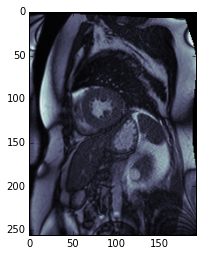

./0011.dcm
11 98.2817382812 0011.dcm


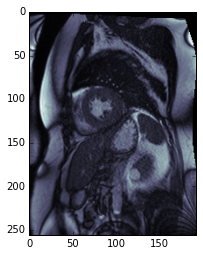

./0012.dcm
12 98.2895914714 0012.dcm


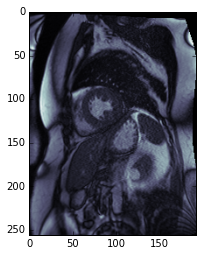

./0013.dcm
13 98.424601237 0013.dcm


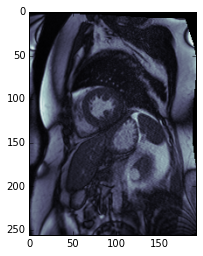

./0014.dcm
14 98.5292358398 0014.dcm


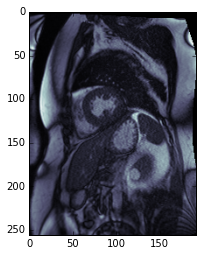

./0015.dcm
15 98.7197062174 0015.dcm


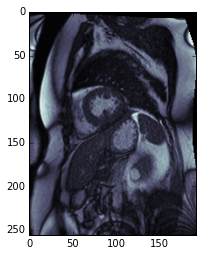

./0016.dcm
16 99.1221516927 0016.dcm


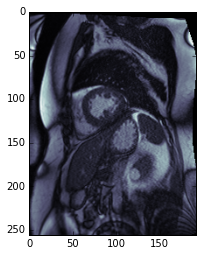

./0017.dcm
17 99.6453857422 0017.dcm


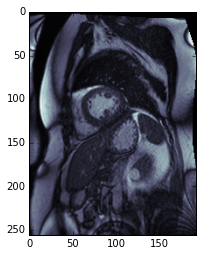

./0018.dcm
18 99.9095458984 0018.dcm


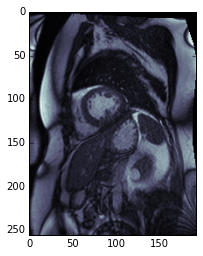

./0019.dcm
19 99.6970011393 0019.dcm


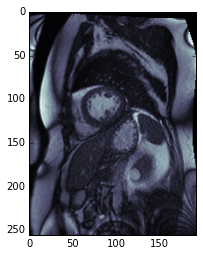

./0020.dcm
20 99.480855306 0020.dcm


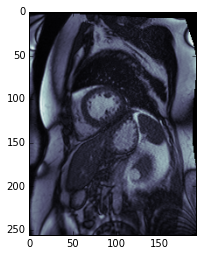

./0021.dcm
21 99.2695922852 0021.dcm


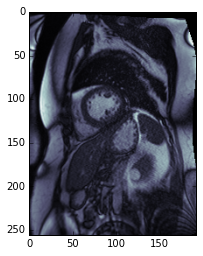

./0022.dcm
22 99.2891235352 0022.dcm


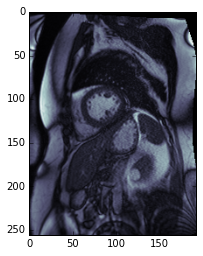

./0023.dcm
23 99.3166097005 0023.dcm


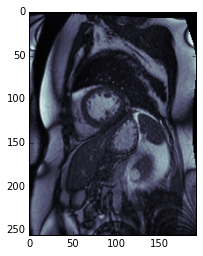

./0024.dcm
24 99.2190755208 0024.dcm


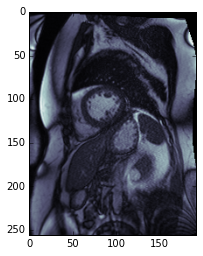

./0025.dcm
25 99.148030599 0025.dcm


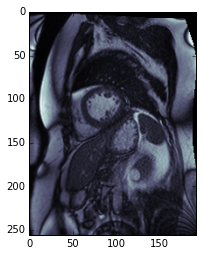

./0026.dcm
26 99.1975301107 0026.dcm


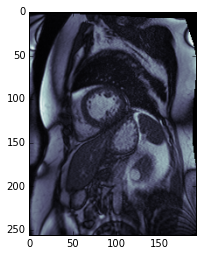

./0027.dcm
27 99.3027547201 0027.dcm


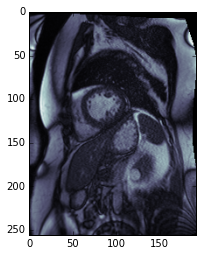

./0028.dcm
28 99.5342814128 0028.dcm


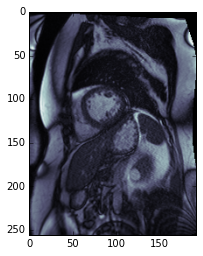

./0029.dcm
29 99.957417806 0029.dcm


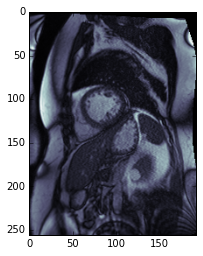

./0030.dcm
30 100.089070638 0030.dcm


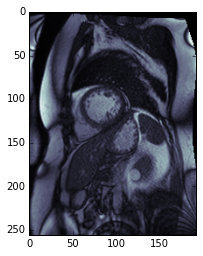

./test.png
./test1.png


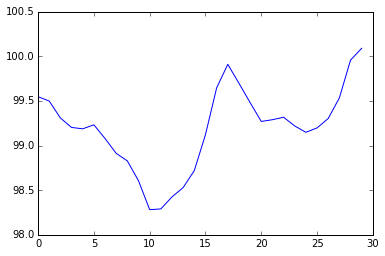

In [11]:
heart = []
files = []
i =0
for f in sorted(os.listdir(path)):
    i+=1
    filepath = path + '/' + f
    print filepath
    ds = dicom.read_file(filepath, force=True)
    #ds
    try:
        data = ds.pixel_array
        meanheart = data.mean()
        heart.append(meanheart)
        files.append(filepath)
        plt.imshow(data, cmap=plt.cm.bone)
        print i, meanheart, f
        plt.show()
    except:
        continue
    
plt.plot(heart)

In [12]:
filessorted = np.array(files)[np.argsort(heart)]

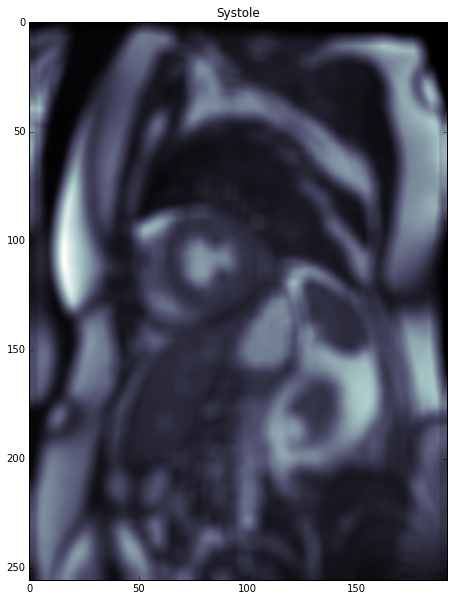

In [13]:
ds = dicom.read_file(filessorted[0])
data1 = ds.pixel_array
data1 = cv2.blur(data1,(7,7))
plt.figure(figsize=(20,10))
plt.title('Systole')
plt.imshow(data1, cmap=plt.cm.bone)

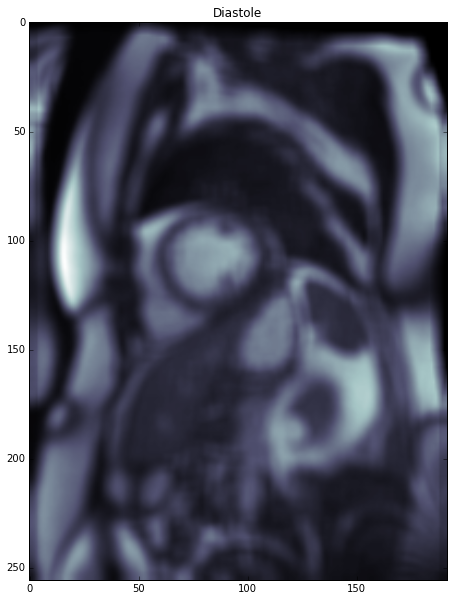

In [14]:
ds = dicom.read_file(filessorted[-1])
data2 = ds.pixel_array
data2 = cv2.blur(data2,(7,7))
plt.figure(figsize=(20,10))
plt.title('Diastole')
plt.imshow(data2, cmap=plt.cm.bone)
savefig('test.png', bbox_inches='tight')

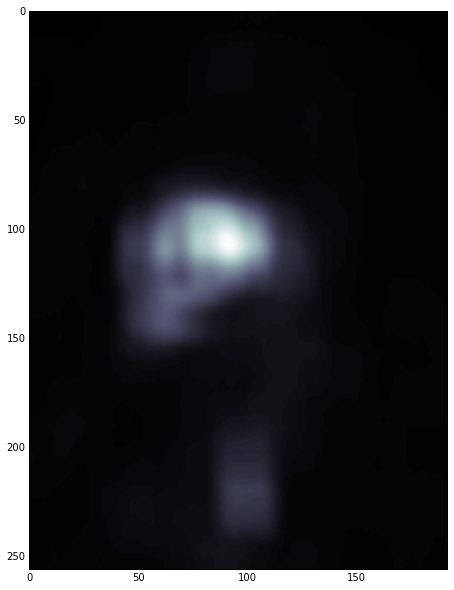

In [15]:
import math
D = abs(data2.astype(int) - data1.astype(int))
D = cv2.blur(D, (25,25))
plt.figure(figsize=(20,10))
plt.imshow(D,cmap=plt.cm.bone)

In [16]:
mask = D > D.mean() + 2 * D.std()

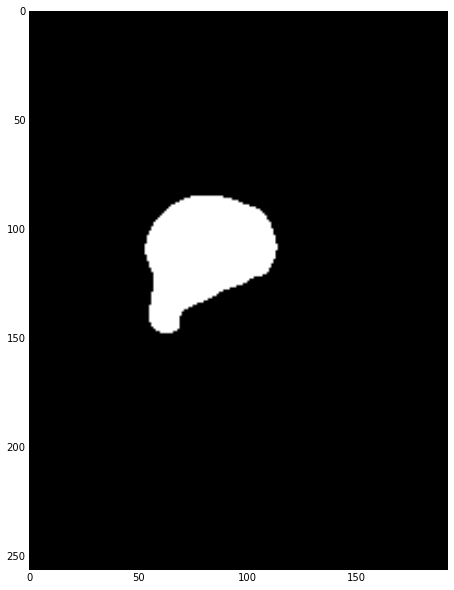

In [17]:
plt.figure(figsize=(20,10))
plt.imshow(mask,cmap=plt.cm.bone)
savefig('test1.png', bbox_inches='tight')

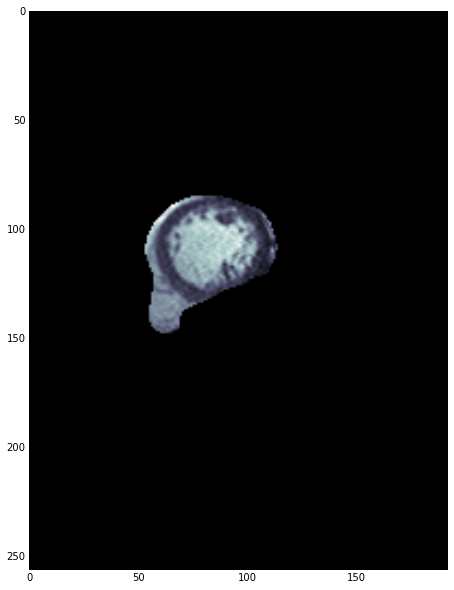

In [18]:
ds = dicom.read_file(filessorted[-1])
data = ds.pixel_array
processed = data.copy() * mask
plt.figure(figsize=(20,10))
plt.imshow(processed,cmap=plt.cm.bone)

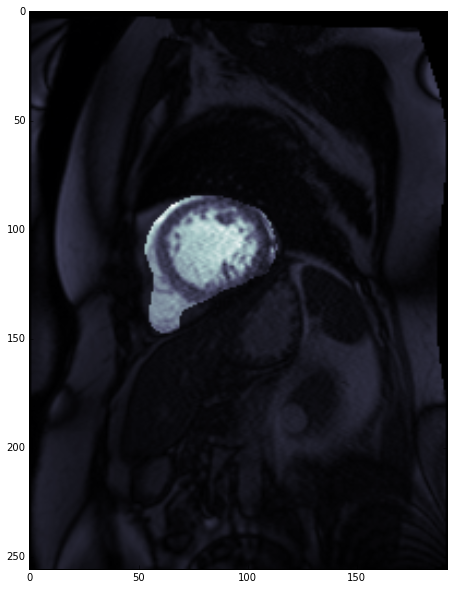

In [19]:
ds = dicom.read_file(filessorted[-1])
data = ds.pixel_array
plt.figure(figsize=(20,10))
plt.imshow(1 * mask * data + data * 0.25,cmap=plt.cm.bone)

In [20]:
processed.max()

300

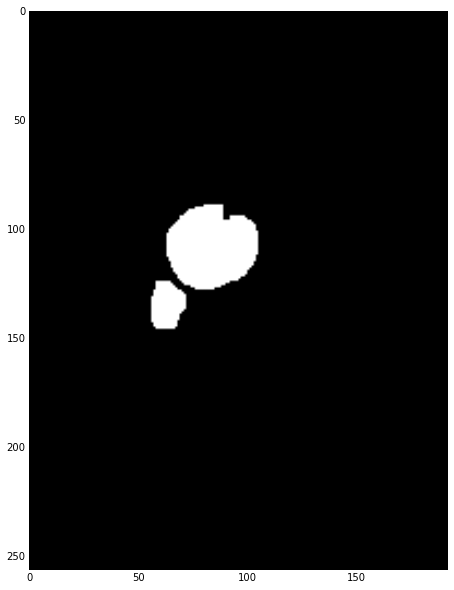

In [53]:
p = cv2.blur(processed, (5,5))
data = np.array(p.astype(float)/p.max() * 255, dtype = np.uint8)
#thresh = cv2.adaptiveThreshold(data,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,5,1)
#thresh = data
_, thresh = cv2.threshold(data,95,255,cv2.THRESH_BINARY)
#contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
plt.figure(figsize=(20,10))
#cv2.drawContours(thresh, contours, -1, (0,255,0), 1)

kernel = np.ones((7, 7),np.uint8)
thresh = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
plt.imshow(thresh,cmap=plt.cm.bone)

In [22]:
# Setup SimpleBlobDetector parameters.
params = cv2.SimpleBlobDetector_Params()
 
# Change thresholds
params.minThreshold = 10;
params.maxThreshold = 200;
 
# Filter by Area.
params.filterByArea = True
params.minArea = 1500
 
# Filter by Circularity
params.filterByCircularity = True
params.minCircularity = 0.1
 
# Filter by Convexity
params.filterByConvexity = True
params.minConvexity = 0.87
 
# Filter by Inertia
params.filterByInertia = True
params.minInertiaRatio = 0.01
 
# Create a detector with the parameters
ver = (cv2.__version__).split('.')
if int(ver[0]) < 3 :
    detector = cv2.SimpleBlobDetector(params)
else : 
    detector = cv2.SimpleBlobDetector_create(params)

In [218]:
keypoints = detector.detect(thresh)

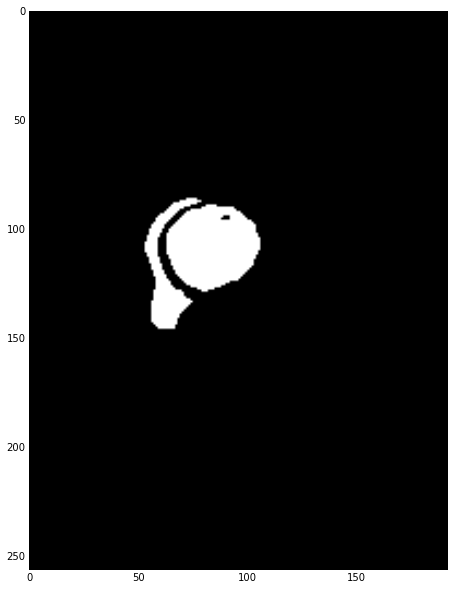

In [225]:
im_with_keypoints = cv2.drawKeypoints(thresh, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Show blobs
plt.figure(figsize=(20,10))
plt.imshow(im_with_keypoints)

In [174]:
thresh[1]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [47]:
# Read image
im = cv2.imread("test.png", cv2.IMREAD_GRAYSCALE)
 

In [24]:
params = cv2.SimpleBlobDetector_Params()

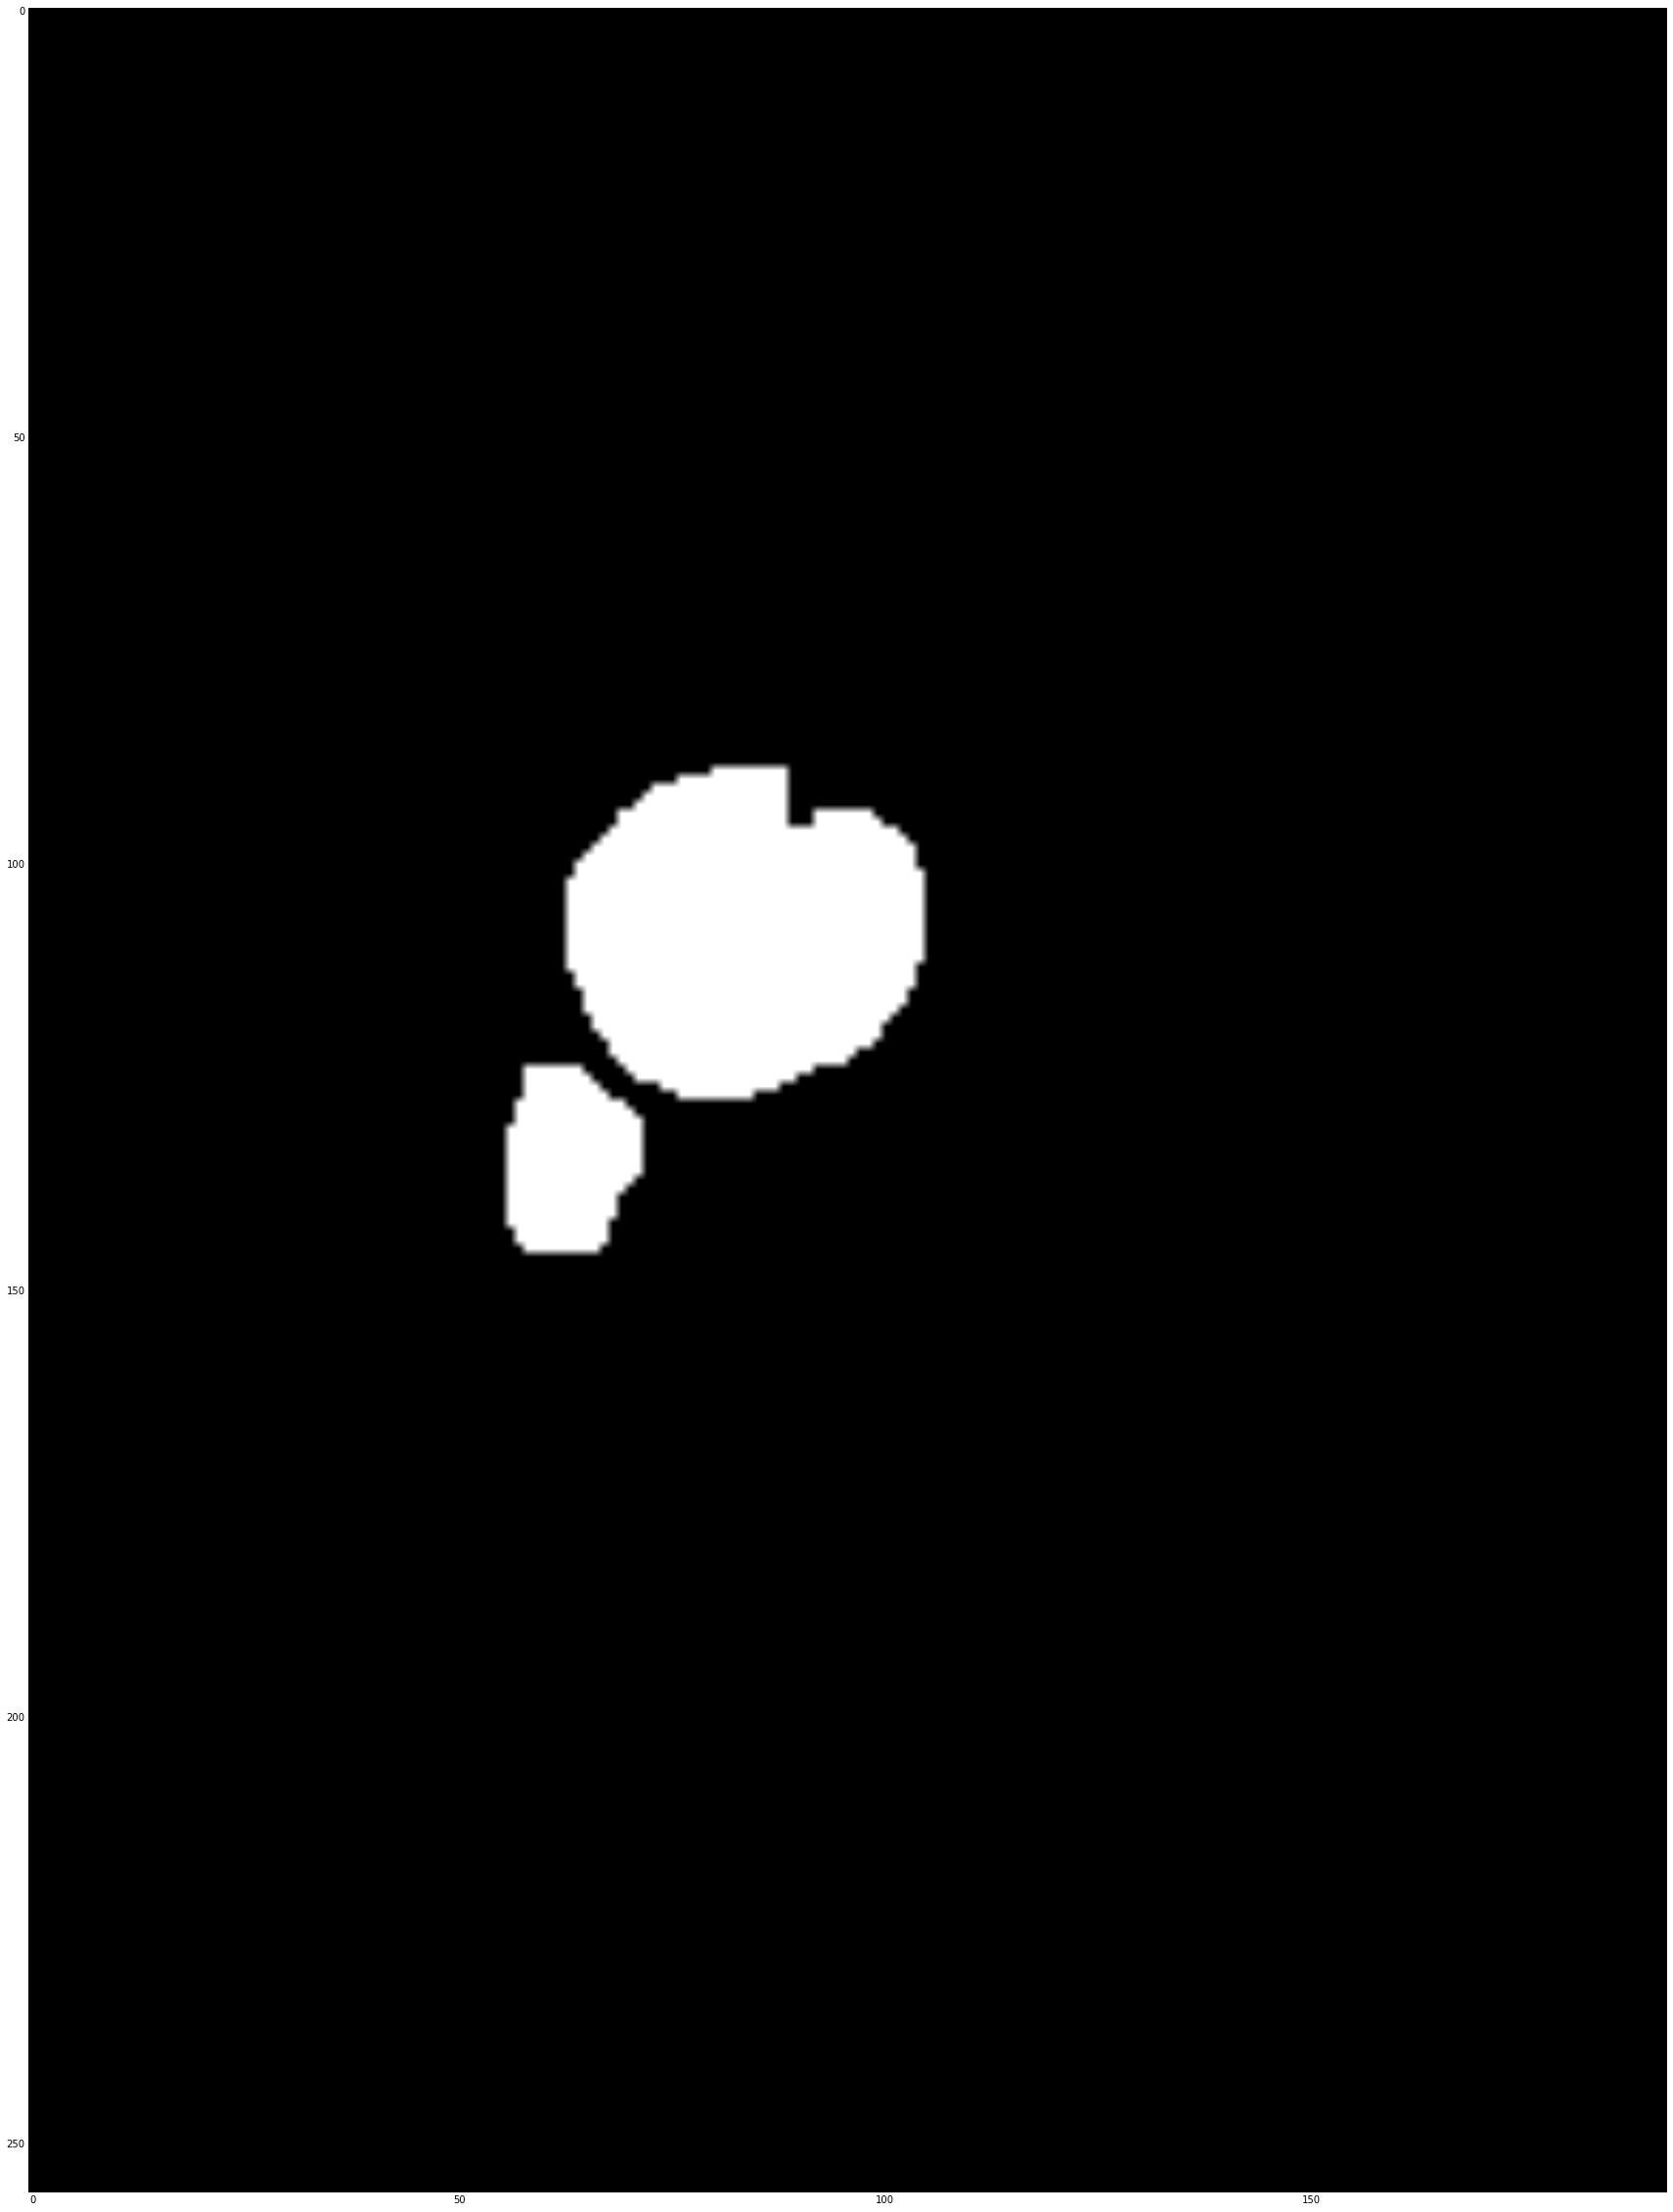

In [57]:
# Change thresholds
params.minThreshold = 50;
params.maxThreshold = 1000;
 
# Filter by Area.
params.filterByArea = False
params.minArea = 50
 
# Filter by Circularity
params.filterByCircularity = False
params.minCircularity = 0.0
 
# Filter by Convexity
params.filterByConvexity = True
params.minConvexity = 0.00
 
# Filter by Inertia
params.filterByInertia = False
params.minInertiaRatio = 0.01

# Set up the detector with default parameters.
detector = cv2.SimpleBlobDetector(params)
 
# Detect blobs.
keypoints = detector.detect(thresh)

# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of the circle corresponds to the size of blob
im_with_keypoints = cv2.drawKeypoints(thresh, keypoints, np.array([]), (255,0,0), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=(40,40))
plt.imshow(im_with_keypoints)

In [42]:
thresh

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
image = cv2.imread("test.png")

In [ ]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [ ]:
# detect circles in the image
circles = cv2.HoughCircles(gray, cv2.cv.CV_HOUGH_GRADIENT, 1.2, 100)
 
# ensure at least some circles were found
if circles is not None:
    # convert the (x, y) coordinates and radius of the circles to integers
    circles = np.round(circles[0, :]).astype("int")
 
    # loop over the (x, y) coordinates and radius of the circles
    for (x, y, r) in circles:
        # draw the circle in the output image, then draw a rectangle
        # corresponding to the center of the circle
        cv2.circle(output, (x, y), r, (0, 255, 0), 4)
        cv2.rectangle(output, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)
 
    # show the output image
    plt.imshow(np.hstack([image, output]))
    #cv2.waitKey(0)

In [ ]:
image = cv2.imread("test1.png")
plt.imshow(image)

In [ ]:
img = cv2.imread('test1.png');
#img = cv2.medianBlur(img,5)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret,th1 = cv2.threshold(img,1,100,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,15,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,15,3)

#titles = ['Original Image', 'Global Thresholding (v = 127)',
#         'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
#images = [image, th1, th2, th3]

plt.imshow(th3)

In [23]:
import subprocess
subprocess.call('src ')

OSError: [Errno 2] No such file or directory